In [91]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
orders=pd.read_csv('orders.csv')

In [4]:
customers=pd.read_csv('customers.csv')

In [5]:
customers

,id,name,segment,state,city
0,CG-12520,Claire Gute,Consumer,Kentucky,Henderson
1,DV-13045,Darrin Van Huff,Corporate,California,Los Angeles
2,SO-20335,Sean O'Donnell,Consumer,Florida,Fort Lauderdale
3,BH-11710,Brosina Hoffman,Consumer,California,Los Angeles
4,AA-10480,Andrew Allen,Consumer,North Carolina,Concord
...,...,...,...,...,...
788,CJ-11875,Carl Jackson,Corporate,Pennsylvania,Philadelphia
789,RS-19870,Roy Skaria,Home Office,Iowa,Burlington
790,SC-20845,Sung Chung,Consumer,Illinois,Arlington Heights
791,RE-19405,Ricardo Emerson,Consumer,Ohio,Kent


In [7]:
orders

,id,order_date,ship_mode,customer_id,sales
0,100006,2014-09-07,Standard,DK-13375,377.970
1,100090,2014-07-08,Standard,EB-13705,699.192
2,100293,2014-03-14,Standard,NF-18475,91.056
3,100328,2014-01-28,Standard,JC-15340,3.928
4,100363,2014-04-08,Standard,JM-15655,21.376
...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368
5005,169320,2017-07-23,Second,LH-16900,171.430
5006,169488,2017-09-07,First,AA-10375,56.860
5007,169502,2017-08-28,Standard,MG-17650,113.410


In [ ]:
defect rate = доля поездок за гранью какого-то времени

In [9]:
orders_by_customers = pd.merge(
    orders, customers, how='left',
    left_on='customer_id', right_on='id')

In [10]:
orders_by_customers

,id_x,order_date,ship_mode,customer_id,sales,id_y,name,segment,state,city
0,100006,2014-09-07,Standard,DK-13375,377.970,DK-13375,Dennis Kane,Consumer,Ohio,Marion
1,100090,2014-07-08,Standard,EB-13705,699.192,EB-13705,Ed Braxton,Corporate,Ohio,Akron
2,100293,2014-03-14,Standard,NF-18475,91.056,NF-18475,Neil Franzosisch,Home Office,Illinois,Rockford
3,100328,2014-01-28,Standard,JC-15340,3.928,JC-15340,Jasper Cacioppo,Consumer,California,Los Angeles
4,100363,2014-04-08,Standard,JM-15655,21.376,JM-15655,Jim Mitchum,Corporate,New Jersey,Bridgeton
...,...,...,...,...,...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368,JO-15145,Jack O'Briant,Corporate,Pennsylvania,Philadelphia
5005,169320,2017-07-23,Second,LH-16900,171.430,LH-16900,Lena Hernandez,Consumer,Delaware,Dover
5006,169488,2017-09-07,First,AA-10375,56.860,AA-10375,Allen Armold,Consumer,Arizona,Mesa
5007,169502,2017-08-28,Standard,MG-17650,113.410,MG-17650,Matthew Grinstein,Home Office,Pennsylvania,Philadelphia


In [12]:
orders_by_customers.columns

Index(['id_x', 'order_date', 'ship_mode', 'customer_id', 'sales', 'id_y',
       'name', 'segment', 'state', 'city'],
      dtype='object')

In [13]:
orders_by_customers[orders_by_customers.id_y.notnull()]

,id_x,order_date,ship_mode,customer_id,sales,id_y,name,segment,state,city
0,100006,2014-09-07,Standard,DK-13375,377.970,DK-13375,Dennis Kane,Consumer,Ohio,Marion
1,100090,2014-07-08,Standard,EB-13705,699.192,EB-13705,Ed Braxton,Corporate,Ohio,Akron
2,100293,2014-03-14,Standard,NF-18475,91.056,NF-18475,Neil Franzosisch,Home Office,Illinois,Rockford
3,100328,2014-01-28,Standard,JC-15340,3.928,JC-15340,Jasper Cacioppo,Consumer,California,Los Angeles
4,100363,2014-04-08,Standard,JM-15655,21.376,JM-15655,Jim Mitchum,Corporate,New Jersey,Bridgeton
...,...,...,...,...,...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368,JO-15145,Jack O'Briant,Corporate,Pennsylvania,Philadelphia
5005,169320,2017-07-23,Second,LH-16900,171.430,LH-16900,Lena Hernandez,Consumer,Delaware,Dover
5006,169488,2017-09-07,First,AA-10375,56.860,AA-10375,Allen Armold,Consumer,Arizona,Mesa
5007,169502,2017-08-28,Standard,MG-17650,113.410,MG-17650,Matthew Grinstein,Home Office,Pennsylvania,Philadelphia


In [15]:
orders_by_customers.groupby('id_y').count()

,id_x,order_date,ship_mode,customer_id,sales,name,segment,state,city
id_y,,,,,,,,,
AA-10315,5,5,5,5,5,5,5,5,5
AA-10375,9,9,9,9,9,9,9,9,9
AA-10480,4,4,4,4,4,4,4,4,4
AA-10645,6,6,6,6,6,6,6,6,6
AB-10015,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...
XP-21865,11,11,11,11,11,11,11,11,11
YC-21895,5,5,5,5,5,5,5,5,5
YS-21880,8,8,8,8,8,8,8,8,8


In [32]:
orders_by_customers['order_year'] = orders_by_customers['order_date'].str[0:4:1]

In [42]:
orders_by_customers

,id_x,order_date,ship_mode,customer_id,sales,id_y,name,segment,state,city,order_year
0,100006,2014-09-07,Standard,DK-13375,377.970,DK-13375,Dennis Kane,Consumer,Ohio,Marion,2014
1,100090,2014-07-08,Standard,EB-13705,699.192,EB-13705,Ed Braxton,Corporate,Ohio,Akron,2014
2,100293,2014-03-14,Standard,NF-18475,91.056,NF-18475,Neil Franzosisch,Home Office,Illinois,Rockford,2014
3,100328,2014-01-28,Standard,JC-15340,3.928,JC-15340,Jasper Cacioppo,Consumer,California,Los Angeles,2014
4,100363,2014-04-08,Standard,JM-15655,21.376,JM-15655,Jim Mitchum,Corporate,New Jersey,Bridgeton,2014
...,...,...,...,...,...,...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368,JO-15145,Jack O'Briant,Corporate,Pennsylvania,Philadelphia,2017
5005,169320,2017-07-23,Second,LH-16900,171.430,LH-16900,Lena Hernandez,Consumer,Delaware,Dover,2017
5006,169488,2017-09-07,First,AA-10375,56.860,AA-10375,Allen Armold,Consumer,Arizona,Mesa,2017
5007,169502,2017-08-28,Standard,MG-17650,113.410,MG-17650,Matthew Grinstein,Home Office,Pennsylvania,Philadelphia,2017


In [33]:
orders_by_customers['order_year']

0       2014
1       2014
2       2014
3       2014
4       2014
        ... 
5004    2017
5005    2017
5006    2017
5007    2017
5008    2017
Name: order_year, Length: 5009, dtype: object

In [48]:
cohorts= orders_by_customers.groupby('customer_id',as_index=False)['order_year'].min()
cohorts.rename(columns = {'order_year':'Cohort'},inplace=True)
cohorts

,customer_id,Cohort
0,AA-10315,2014
1,AA-10375,2014
2,AA-10480,2014
3,AA-10645,2014
4,AB-10015,2014
...,...,...
788,XP-21865,2014
789,YC-21895,2014
790,YS-21880,2015
791,ZC-21910,2014


In [49]:
df_merged= pd.merge(orders_by_customers,cohorts , how='left', on='customer_id')
df_merged

,id_x,order_date,ship_mode,customer_id,sales,id_y,name,segment,state,city,order_year,Cohort
0,100006,2014-09-07,Standard,DK-13375,377.970,DK-13375,Dennis Kane,Consumer,Ohio,Marion,2014,2014
1,100090,2014-07-08,Standard,EB-13705,699.192,EB-13705,Ed Braxton,Corporate,Ohio,Akron,2014,2014
2,100293,2014-03-14,Standard,NF-18475,91.056,NF-18475,Neil Franzosisch,Home Office,Illinois,Rockford,2014,2014
3,100328,2014-01-28,Standard,JC-15340,3.928,JC-15340,Jasper Cacioppo,Consumer,California,Los Angeles,2014,2014
4,100363,2014-04-08,Standard,JM-15655,21.376,JM-15655,Jim Mitchum,Corporate,New Jersey,Bridgeton,2014,2014
...,...,...,...,...,...,...,...,...,...,...,...,...
5004,168802,2017-11-03,Standard,JO-15145,18.368,JO-15145,Jack O'Briant,Corporate,Pennsylvania,Philadelphia,2017,2014
5005,169320,2017-07-23,Second,LH-16900,171.430,LH-16900,Lena Hernandez,Consumer,Delaware,Dover,2017,2014
5006,169488,2017-09-07,First,AA-10375,56.860,AA-10375,Allen Armold,Consumer,Arizona,Mesa,2017,2014
5007,169502,2017-08-28,Standard,MG-17650,113.410,MG-17650,Matthew Grinstein,Home Office,Pennsylvania,Philadelphia,2017,2014


In [50]:
df_merged.columns

Index(['id_x', 'order_date', 'ship_mode', 'customer_id', 'sales', 'id_y',
       'name', 'segment', 'state', 'city', 'order_year', 'Cohort'],
      dtype='object')

In [59]:
def cohort_period(df):
    """
    Creates column CohortPeriod
    """
    df['CohortPeriod'] = np.arange(len(df))
    return df

In [89]:
cohorts_group = df_merged.groupby(['Cohort', 'order_year']).agg({'customer_id': pd.Series.nunique})
cohorts_group.rename(columns={'customer_id': 'TotalUsers',
                        'id_x': 'TotalOrders'}, inplace=True)
cohorts_group = cohorts_group.groupby(level=0).apply(cohort_period)
cohorts_group.reset_index(inplace=True)
cohorts_group.set_index(['Cohort', 'CohortPeriod'], inplace=True)
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)

In [94]:
cohort_group_size

Cohort
2014    595
2015    136
2016     51
2017     11
Name: TotalUsers, dtype: int64

In [88]:
cohorts_group

order_year  TotalUsers
Cohort CohortPeriod                       
2014   0                  2014         595
       1                  2015         437
       2                  2016         485
       3                  2017         517
2015   0                  2015         136
       1                  2016         102
       2                  2017         120
2016   0                  2016          51
       1                  2017          45
2017   0                  2017          11

In [90]:
user_retention.T


CohortPeriod,0,1,2,3
Cohort,,,,
2014,1.0,0.734454,0.815126,0.868908
2015,1.0,0.750000,0.882353,NaN
2016,1.0,0.882353,NaN,NaN
2017,1.0,NaN,NaN,NaN


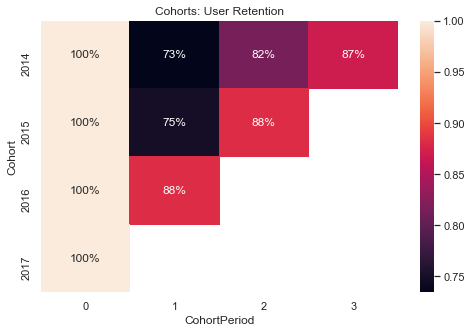

In [93]:
sns.set(style='white')
plt.figure(figsize=(8, 5))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');